# **Implementation of Search and Shortest Path Algorithms**



---



In [2]:
import time, itertools, string, random
import pandas as pd
import heapq

#to show the full image of the weighetd graph:
import matplotlib.pyplot as plt
import networkx as nx

from os import stat_result
from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue
from collections import deque

This notebook presents the use of different search algorithms and their summarized definition. Also, for each algorithm, we will implement the solution of different problems or data structures, depending on the limitations and instructions of each method to demonstrate their functionality

This is the list of 'em:

* Breadth-First Search (BFS): *Weighted Graph* ✅
* Depth-First Search (DFS): *Weighted Graph* ✅
* Uniform-Cost Search (UCS): *Weighted Graph* ✅
* Depth-Limited Search (DLS): *Weighted Graph* ✅
* Iterative Deepening Depth-First Search (IDDFS): *Sliding Puzzle 8* ✅
* Bidirectional Search: *Sliding Puzzle 8* ✅
* A* (A-star) Search: *Sliding Puzzle 8*
* IDA* Search: *Sliding Puzzle 8* ✅
* Pruning: Minimax pruning (with Alpha-Beta optimization): *Tic-Tac-Toe* ✅
* Dijkstra's Algorithm: *Weighted Graph* ✅
* Floyd-Warshall Algorithm: *Weighted Graph* ✅



---



The division for this notebook that has 3 different data structures (problems), will be organized like this:

*Data Structure*:
* Algorithms:
  * Algorithm Structure (block of code)
  * Test of each implementation

For the structures we will have:
1. Weighted Graph
2. 8-Puzzle
3. Tic-Tac-Toe



---



# 1. Weighted Graph

Algorithms selected:
1. Breadth-Firts Search
2. Depth-Fisrt Search
3. Uniform-Cost Search
4. Depth-Limited Search
5. Dijkstra's Algorithm
6. Floyd-Warshall Algorithm

*(It is known that there are some codes that can work with specific problems and structures, I'm studying those for now to determine the type of data structures we will present here)*

Here's the presentation of the data structures in Classes:

The Weighted Graph will present a collection of nodes and vertices, where each connection has a "cost" or "weight. Its purpose is to store and adjacency list (connection between neighbors and weight of those connections). Useful to compare results and ways of solutions from algorithms like BFS, DFS, Uniform-Cost, Dijkstra, etc.

In [3]:
#------------------------------------------------------------------------------------------------------------------
#   WeightedGraph class
#------------------------------------------------------------------------------------------------------------------
class WeightedGraph:
    """
        Class that is used to represent a weighted graph. Internally, the class uses an adjacency list to store
        the vertices and edges of the graph. This adjacency list is defined by a dictionary, whose keys
        represent the vertices. For each vertex, there is a list of tuples (v,e) that indicate which vertices
        are connected to the vertex and their corresponding weights.

        The graph can be directed or indirected. In the class constructor, this property is set. The
        behaviour of some operations depends on this property.

        This graph class assumes that it is possible to have multiple links between vertices.
    """

    _directed = True         # This flag indicates whether the graph is directed or indirected.

    _adjacency_list = {}     # The adjacency list of the graph.


    def __init__(self, directed:bool = False):
        """
            This constructor initializes an empty graph.

            param directed: A flag that indicates whether the graph is directed (True) or undirected (False).
        """

        self._directed = directed
        self._adjacency_list = {}

    def clear(self):
        """
            This method clears the graph.
        """
        self._adjacency_list = {}

    def number_of_vertices(self):
        """
            This method returns the number of vertices of the graph.
        """
        return len(self._adjacency_list)

    def vertices(self):
        """
            This method returns the list of vertices.
        """
        v = []
        for vi in self._adjacency_list:
            v.append(vi)
        return v

    def edges(self):
        """
            This method returns the list of edges.
        """
        e = []

        if self._directed:
            for v in self._adjacency_list:
                for edge in self._adjacency_list[v]:
                    e.append((v, edge[0], edge[1]))

        else:
            for v in self._adjacency_list:
                for edge in self._adjacency_list[v]:
                    if (edge[0], v, edge[1]) not in e:
                        e.append((v, edge[0], edge[1]))
        return e


    def add_vertex(self, v):
        """
            Add vertex to the graph.

            param v: The new vertex to be added to the graph.
        """

        if v in self._adjacency_list:
            print("Warning: Vertex ", v, " already exists.")

        else:
            self._adjacency_list[v] = []

    def remove_vertex(self, v):
        """
            Remove vertex from the graph.

            param v: The vertex to be removed from the graph.
        """

        if v not in self._adjacency_list:
            print("Warning: Vertex ", v, " is not in graph.")

        else:
            # Remove vertex from adjacency list.
            self._adjacency_list.remove(v)

            # Remove edges where the vertex is an end point.
            for vertex in self._adjacency_list:
                for edge in self._adjacency_list[vertex]:
                    if edge[0] == v:
                        self._adjacency_list[vertex].remove(edge)

    def add_edge(self, v1, v2, e = 0):
        """
            Add edge to the graph. The edge is defined by two vertices v1 and v2, and
            the weigth e of the edge.

            param v1: The start vertex of the new edge.
            param v2: The end vertex of the new edge.
            param e: The weight of the new edge.
        """

        if v1 not in self._adjacency_list:
            # The start vertex does not exist.
            print("Warning: Vertex ", v1, " does not exist.")

        elif v2 not in self._adjacency_list:
            # The end vertex does not exist.
            print("Warning: Vertex ", v2, " does not exist.")

        elif not self._directed and v1 == v2:
            # The graph is undirected, so it is no allowed to have autocycles.
            print("Warning: An undirected graph cannot have autocycles.")

        elif (v2, e) in self._adjacency_list[v1]:
            # The edge is already in graph.
            print("Warning: The edge (", v1, "," ,v2, ",", e, ") already exists.")
        else:
            self._adjacency_list[v1].append((v2, e))
            if not self._directed:
                self._adjacency_list[v2].append((v1, e))

    def remove_edge(self, v1, v2, e):
        """
            Remove edge from the graph.

            param v1: The start vertex of the edge to be removed.
            param v2: The end vertex of the edge to be removed.
            param e: The weight of the edge to be removed.
        """

        if v1 not in self._adjacency_list:
            # v1 is not a vertex of the graph
            print("Warning: Vertex ", v1, " does not exist.")

        elif v2 not in self._adjacency_list:
            # v2 is not a vertex of the graph
            print("Warning: Vertex ", v2, " does not exist.")

        else:
            for edge in self._adjacency_list[v1]:
                if edge == (v2, e):
                    self._adjacency_list[v1].remove(edge)

            if not self._directed:
                for edge in self._adjacency_list[v2]:
                    if edge == (v1, e):
                        self._adjacency_list[v2].remove(edge)

    def adjacent_vertices(self, v):
        """
            Adjacent vertices of a vertex.

            param v: The vertex whose adjacent vertices are to be returned.
            return: The list of adjacent vertices of v.
        """

        if v not in self._adjacency_list:
            # The vertex is not in the graph.
            print("Warning: Vertex ", v, " does not exist.")
            return []

        else:
            return self._adjacency_list[v]

    def is_adjacent(self, v1, v2) -> bool:
        """
            This method indicates whether vertex v2 is adjacent to vertex v1.

            param v1: The start vertex of the relation to test.
            param v2: The end vertex of the relation to test.
            return: True if v2 is adjacent to v1, False otherwise.
        """

        if v1 not in self._adjacency_list:
            # v1 is not a vertex of the graph
            print("Warning: Vertex ", v1, " does not exist.")
            return False

        elif v2 not in self._adjacency_list:
            # v2 is not a vertex of the graph
            print("Warning: Vertex ", v2, " does not exist.")
            return False

        else:
            for edge in self._adjacency_list[v1]:
                if edge[0] == v2:
                    return True
            return False

    def print_graph(self):
        """
            This method shows the edges of the graph.
        """

        for vertex in self._adjacency_list:
            for edges in self._adjacency_list[vertex]:
                print(vertex, " -> ", edges[0], " edge weight: ", edges[1])


This class will be useful to keep track of the path the algorithm took to get to the actual node and the total accumulated so far (needed for A* Search, for example). The TreeNode will save this information.

In [4]:
#------------------------------------------------------------------------------------------------------------------
#   Class TreeNode
#------------------------------------------------------------------------------------------------------------------
class TreeNode:
    """
        Class that is used to represent a node in the search algorithm. A node contains the following elements:
        * A reference to its parent.
        * The vertex of the graph that is represented.
        * The total path cost from the root to the node.
    """

    def __init__(self, parent, v, c):
        """
            This constructor initializes a node.

            param parent: The node parent.
            param v: The graph vertex that is represented by the node.
            param c: The path cost to the node from the root.
        """
        self.parent = parent
        self.v = v
        self.c = c

    def __lt__(self, node):
        """
            Operator <. This definition is requiered by the PriorityQueue class.
        """
        return False;


    def path(self):
        """
            This method builds a list with the vertices of the path from the root to the node.

            return: The path from the root to the node
        """
        node = self
        path = []
        while node != None:
            path.insert(0, node.v)
            node = node.parent
        return path;



---



Now, let's present the search algorithms and their code structure:

**1. Breadth First Search (BFS)**

This first algorithm will visit from the initial (source) node (selected) the closest adjacent node (known as neigbors) until there are not any other adjacent node to visit. This method ensures the full visitation of all of the nodes contained in the graph until it find the goal node (known also as vertex). It uses a queue known as FIFO to ensure order.

Will explain variables:

- v0: The starting vertex (the source node).

- vg: The goal vertex (the target node).
- start_time = time.time(): Records the current time (in seconds since the epoch) just before the search begins. This is used later to calculate the total execution time of the algorithm.



In [5]:
#------------------------------------------------------------------------------------------------------------------
#   Breadth-first search algorithm
#------------------------------------------------------------------------------------------------------------------
def bfs(graph:WeightedGraph, v0, vg):
    """
        Breadth-first search returning path, cost and metrics
    """
    #To track amount of time to obtain results
    start_time=time.time()

    # Check graph and vertices
    if v0 not in graph.vertices():
        print("Warning: Vertex", v0, "is not in Graph")
    if vg not in graph.vertices():
        print("Warning: Vertex", vg, "is not in Graph")

    # Initialize frontier
    frontier = Queue()
    frontier.put(TreeNode(None, v0, 0))

    # Initialize explored set
    explored_set = set()

    nodes_expanded = 0
    nodes_generated = 1 #Initial

    while True:
        if frontier.empty():
            return {"Path": None, "Cost": None,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        # Get node from frontier
        node = frontier.get()

        # Test node
        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        # Expand node-----
        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))
                nodes_generated += 1

        # Add node to the explored set
        explored_set.add(node.v)
        nodes_expanded += 1



**2. Depth-First Search**

The second search algorithm have similar features as the first one, with the condition of a full visitation of all the nodes before backtrackin to explore alternative branches or edges (depending on the data structure). Is also known as Trasversal, meaning that will visit ALL nodes of a graph in an organized way but not uniform.

The algorithm also contains 2 categories: Visited and Not Visited. For the visited group we will have the initial node to analize, and in Not Visited we will cotain the adjacent nodes of this initial node to visit, for example.

The initial setup is almost identical to BFS, with one critical difference:

- `frontier = LifoQueue()`:  The frontier is initialized as a LIFO (Last-In, First-Out) queue, also known as a stack. This is the core change that makes the algorithm DFS. It will always expand the most recently discovered node first, leading to a deep exploration.

In [6]:
#------------------------------------------------------------------------------------------------------------------
#   Depth-first search algorithm
#------------------------------------------------------------------------------------------------------------------
def dfs(graph:WeightedGraph, v0, vg):
    """
        Depth-first search returning path, cost and metrics.
    """

    #To track amount of time to obtain results
    start_time=time.time()

    # Check graph and vertices
    if v0 not in graph.vertices():
        print("Warning: Vertex", v0, "is not in Graph")

    if vg not in graph.vertices():
        print("Warning: Vertex", vg, "is not in Graph")

    # Initialize frontier
    frontier = LifoQueue()
    frontier.put(TreeNode(None, v0, 0))

    # Initialize explored set
    explored_set = set()

    nodes_expanded = 0
    nodes_generated = 1 #Initial

    while True:
        if frontier.empty():
            return {"Path": None, "Cost": None,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        # Get node from frontier
        node = frontier.get()

        #Skip visited ones
        if node.v in explored_set:
          continue

        # Test node
        if node.v == vg:
            # Return path and cost as a dictionary
            return {"Path": node.path(), "Cost": node.c,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        #Expansion
        adjacent_vertices = graph.adjacent_vertices(node.v)

        #pushing neighbors in reverse order
        for vertex in reversed(adjacent_vertices):
          if vertex[0] not in explored_set:
            frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))
            nodes_generated +=1

        # Expand node
       # if node.v not in explored_set:
        #    adjacent_vertices = gr.adjacent_vertices(node.v)
         #   for vertex in adjacent_vertices:
          #      frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))

        # Add node to explored set
        explored_set.add(node.v)
        nodes_expanded += 1



**3. Uniform-cost Search**

This algorithm will find the LOWEST cost path (mostly on a weighted graph) by systematically expanding the node with the lowest cumulative cost first. Also, with its queues (priority) avoids cycles and redundancy (not re-visit the visited nodes). Its the go-to algorithm for finding the lowest-cost path when there's no more information available (a heuristic). Like a BFS but better

This queue will store nodes, by selecting the most cost-effective path from it to explore next. Relies on path cost from the initial node to the goal node.

The node is marked as explored.

*Note: In UCS, a node is "explored" only when it is popped from the queue and passes the cost check, meaning we have found the optimal path to that vertex.*


In [7]:
#------------------------------------------------------------------------------------------------------------------
#   Uniform cost search algorithm
#------------------------------------------------------------------------------------------------------------------
def uniform_cost(graph:WeightedGraph, v0, vg):
    """
        Uniform cost search returning path, cost and metrics.
    """

    start_time = time.time()

    # Check graph and vertices
    if v0 not in graph.vertices():
        print("Warning: Vertex", v0, "is not in Graph")
    if vg not in graph.vertices():
        print("Warning: Vertex", vg, "is not in Graph")

    # Initialize frontier (cost, counter, TreeNode) to avoid comparisons
    frontier = PriorityQueue()
    counter = itertools.count()
    frontier.put((0, next(counter), TreeNode(None, v0, 0)))

    #best cost so far
    best_cost = {v0: 0}

    # Initialize explored set
    explored_set = set()

    nodes_expanded = 0
    nodes_generated = 1

    while True:
        if frontier.empty():
            return {"Path": None, "Cost": None,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        # Get node from frontier (lowest cost)
        _, _, node = frontier.get()

        #if the node is worse than best known, skip
        if node.c > best_cost.get(node.v, float('inf')):
          continue

        # Test node
        if node.v == vg:
            # Return path and cost as a dictionary
            return {"Path": node.path(), "Cost": node.c,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": time.time() - start_time}

        # Expand node
        adjacent_vertices = graph.adjacent_vertices(node.v)
        for vertex in adjacent_vertices:
          adj = vertex[0]
          w = vertex[1]
          cost = node.c + w

          #if there's a better path to adj, add to frontier
          if cost < best_cost.get(adj, float('inf')):
            best_cost[adj] = cost
            frontier.put((cost, next(counter), TreeNode(node, adj, cost)))
            nodes_generated += 1

        # Add node to explored set
        explored_set.add(node.v)
        nodes_expanded += 1



**4. Depth-Limited Search**

It will performs like a DFS but only to a pre-defined limit depth, which we will select depending on the structure of the graph to analyze. If there's no answer of the goal by that depth, it backtracks.

For some variables:

- `found_node = None`: A variable to store the TreeNode if the goal is found. It starts as None.

- `visited = set()`: This set keeps track of vertices that are currently on the recursion path to prevent cycles within a single branch of the search. It is different from explored_set in BFS/DFS/UCS.


In [8]:
#------------------------------------------------------------------------------------------------------------------
#   Depth-Limited Search (DLS)
#------------------------------------------------------------------------------------------------------------------

def depth_limited_search(graph: WeightedGraph, v0, vg, limit):
  """
        Depth-Limited Search with needed metrics for comparison
  """

  start_time = time.time()

  #checking of the nodes
  if v0 not in graph.vertices():
    print("Warning: Vertex", v0, "is not in Graph")
  if vg not in graph.vertices():
    print("Warning: Vertex", vg, "is not in the Graph")

  #counting
  nodes_expanded = 0
  nodes_generated = 1

  found_node = None
  visited = set()

  def recurse(node, depth):
    nonlocal nodes_expanded, nodes_generated, found_node
    if node.v == vg:
      found_node = node
      return True
    if depth == 0:
      return False

    nodes_expanded += 1
    visited.add(node.v)

    for (adj, w) in graph.adjacent_vertices(node.v):
      if adj in visited:
        continue
      child = TreeNode(node, adj, node.c + w)
      nodes_generated += 1
      if recurse(child, depth - 1):
        return True

    visited.remove(node.v)
    return False

  root = TreeNode(None, v0, 0)
  recurse(root, limit)

  elapsed = time.time() - start_time
  if found_node is None:
    return{"Path": None,
             "Cost": None,
             "nodes_expanded": nodes_expanded,
             "nodes_generated": nodes_generated,
             "time": elapsed}
  else:
   return{"Path": found_node.path(),
             "Cost": found_node.c,
             "nodes_expanded": nodes_expanded,
             "nodes_generated": nodes_generated,
             "time": elapsed}



**5. Dijkstra's Search**

finds the shortest path between a starting point and all other points in a network (in this case, Weighted Graph). A known example is having a  map with cities connected by roads, and each road has a distance.

Some functions and variables are:

`dist = {start:0}`: A dictionary to store the shortest known distance (cost) from the start to every other vertex. Initialized with start at cost 0.

`parents = {start:None}`: A dictionary to store the predecessor (parent) of each vertex in the shortest path. This is used to reconstruct the path later. The start vertex has no parent (None).

In [9]:
#------------------------------------------------------------------------------------------------------------------
#   Dijkstra's Search
#------------------------------------------------------------------------------------------------------------------

def dijs (graph:WeightedGraph, start, goal=None):

  start_time = time.time()
  frontier = PriorityQueue()
  counter = itertools.count()

  frontier.put((0, next(counter),start))
  dist = {start:0}
  parents = {start:None}
  nodes_expanded = 0
  nodes_generated = 1

  while not frontier.empty():
    d, _, u = frontier.get()
    if d > dist.get(u, float('inf')):
      continue
    nodes_expanded += 1
    if goal is not None and u == goal:
      path = []
      s = u
      while s is not None:
        path.append(s)
        s = parents[s]
      path.reverse()
      elapsed = time.time() - start_time
      return {"found": True,
              "Path": path,
              "Cost": dist[u],
              "nodes_expanded": nodes_expanded,
              "nodes_generated": nodes_generated,
              "Time": elapsed}
    for (v,w) in graph.adjacent_vertices(u):
      nd = d + w
      if nd < dist.get(v, float('inf')):
        dist[v] = nd
        parents[v] = u
        frontier.put((nd, next(counter),v))
        nodes_generated += 1

  elapsed = time-time() - start_time
  if goal is None:
    return {"distances": dist,
            "time": elapsed}

  else:
    return {"found": False,
            "path": None,
            "cost": None,
            "nodes_expanded": nodes_expanded,
            "nodes_generated": nodes_generated,
            "time": elapsed}



**6. Floyd-Warshall Algorithm**

This algorithm will find the shortest paths between all pairs of nodes in a graph. Same example as the roads between cities, where each road has a distance.

Some needed functions and variables for it:

- `verts = graph.vertices()`: Gets a list of all vertices in the graph.

- `dist = {u: {v: float('inf') for v in verts} for u in verts}`: Initializes the dist matrix as a 2D dictionary (a dictionary of dictionaries). dist[u][v] will store the shortest known distance from u to v. It's initially set to infinity for all pairs, meaning "no path known".

- `next_node = {u:{ v: None for v in verts} for u in verts}`: Initializes the next_node matrix. next_node[u][v] will store the next vertex to go to on the shortest path from u to v. It's initially None for all pairs.

In [10]:
#------------------------------------------------------------------------------------------------------------------
#   Floyd-Warshall Algorithm
#------------------------------------------------------------------------------------------------------------------

def fwa (graph:WeightedGraph, start, goal=None):
  start_time = time.time()
  verts= graph.vertices()

  dist = {u: {v: float('inf') for v in verts} for u in verts}
  next_node = {u:{ v: None for v in verts} for u in verts}

  for u in verts:
    dist[u][u] = 0
    for (v,w) in graph.adjacent_vertices(u):
      dist[u][v] = min(dist[u][v], w)
      next_node[u][v] = v

  for k in verts:
    for i in verts:
      for j in verts:
        if dist[i][k] + dist[k][j] < dist[i][j]:
          dist[i][j] = dist[i][k] + dist[k][j]
          next_node[i][j] = next_node[i][k]

  elapsed = time.time() - start_time

  path = None
  cost = None

  if goal is not None and next_node[start][goal] is not None:
        path = [start]
        u = start
        while u != goal:
            u = next_node[u][goal]
            path.append(u)
        cost = dist[start][goal]

  return {
        "Path": path,
        "Cost": cost,
        "nodes_expanded": len(verts)**3,  # proxy
        "nodes_generated": len(verts)**2, # proxy
        "time": elapsed
  }

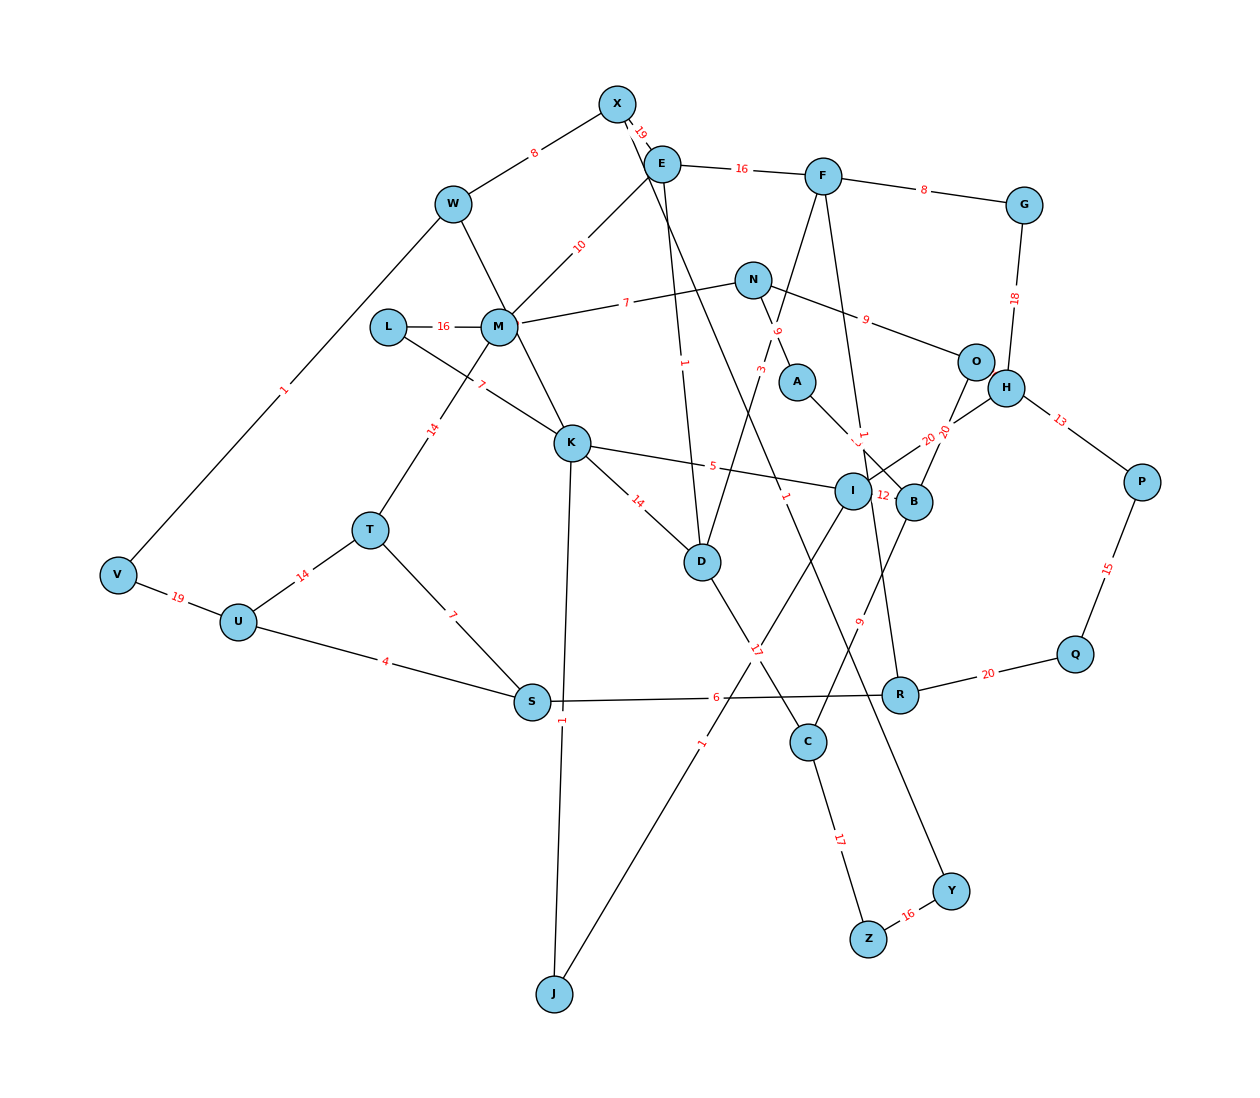

Graph created with 26 vertex and 40 edges


In [11]:
#------------------------------------------------------------------------------------------------------------------
#   VISUAL PRESENTATION OF THE WEIGHTED GRAPH, WITH SPECIFICATIONS
#------------------------------------------------------------------------------------------------------------------

seed = 42

#lables from A to Z in uppercase
labels = list(string.ascii_uppercase)


gr = WeightedGraph(directed = False)
for v in labels:
  gr.add_vertex(v)

#connectivity between letters (nodes)
for i in range(len(labels)-1):
  w = random.randint(1,20)
  gr.add_edge(labels[i], labels[i+1],w)

extra_edges = 15
for _ in range(extra_edges):
  a, b = random.sample(labels, 2)
  w = random.randint(1, 20)
  gr.add_edge(a,b,w)

def draw_weighted_graph(gr):
  """
  Draw known graph to solve and implementation
  using networkx and matplotlib, visualization is important
  """

  directed = getattr(gr, "_directed",False)
  G = nx.DiGraph() if directed else nx.Graph()

  for v in gr.vertices():
    G.add_node(v)

  for u in gr.vertices():
    for (v,w) in gr.adjacent_vertices(u):
      G.add_edge(u,v,weight=w)

  pos = nx.spring_layout(G, k=1.5, iterations=100, seed=42)
  #pos=nx.kamada_kawai_layout(G)

  edge_labels = nx.get_edge_attributes(G, 'weight')

  plt.figure(figsize=(16,14))
  nx.draw_networkx_edges(G,pos,width=1, edge_color='black', arrows=directed)
  nx.draw_networkx_edge_labels(G,pos, font_size=8,edge_labels=edge_labels,font_color='red')
  nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
  nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700, edgecolors='black')


  plt.axis('off')
  plt.show()

draw_weighted_graph(gr)
print(f"Graph created with {gr.number_of_vertices()} vertex and {len(gr.edges())} edges")

In [12]:
#------------------------------------------------------------------------------------------------------------------
#   Path finding algorithm test
#------------------------------------------------------------------------------------------------------------------

start= 'A'
goal= 'Z'

res_bfs = bfs(gr,start,goal)
res_dfs = dfs(gr,start,goal)
res_uc = uniform_cost(gr,start,goal)
res_dls = depth_limited_search(gr,start,goal, limit = 26)
res_dijs = dijs(gr,start,goal)
res_fwa = fwa(gr,start,goal)


algorithms = [('BFS', res_bfs),
                  ('DFS', res_dfs),
                  ('UniformCost', res_uc),
                  ('DLS', res_dls),
                  ('Dijkstra',res_dijs),
                  ('Floyd-Warshall',res_fwa)]

rows = []
for name, res in algorithms:
  if res is None:
    res = {}

  path = res.get("Path", res.get("path", None))
  cost = res.get("Cost", res.get("cost", None))
  nodes_expanded = res.get("nodes_expanded", None)
  nodes_generated = res.get("nodes_generated", None)
  elapsed = round(res.get("time", res.get("time_s", 0)), 6)

  rows.append({
              "algorithm": name,
              "found": path is not None,
              "path": path,
              "cost": cost,
              "nodes_expanded": nodes_expanded,
              "nodes_generated": nodes_generated,
              "time_s": elapsed
              })

df = pd.DataFrame(rows).set_index('algorithm')
pd.set_option('display.max_colwidth', None)


**COMPARISONS BETWEEN RESULTS**

In [13]:
print("start:", start, "goal:", goal)

df

start: A goal: Z


,found,path,cost,nodes_expanded,nodes_generated,time_s
algorithm,,,,,,
BFS,True,"[A, B, C, Z]",39,13,31,0.000192
DFS,True,"[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z]",263,25,41,0.000312
UniformCost,True,"[A, B, C, Z]",39,21,30,0.000274
DLS,True,"[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z]",263,25,26,0.000048
Dijkstra,True,"[A, B, C, Z]",39,22,30,0.000000
Floyd-Warshall,True,"[A, B, C, Z]",39,17576,676,0.005534




---


---




# 2. 8-Puzzle

Algorithms selected:
1. Iterative Deepening Depth-First Search (IDDFS)
2. Bidirectional Search
3. A* (A-star) Search
4. IDA* Search

Here's a presentation of a problem that needs to be solved with the adequate algorithms. The 8-puzzle is sliding puzzle with 8 numbered tiles and 1 empty space (which is 0) on a 3x3 grid. The algorithms will need to rearrange the tiles froma random initial position to the goal configuration by sliding the tiles into the empty space.

In [14]:
#------------------------------------------------------------------------------------------------------------------
#   8-puzzle utilities
#------------------------------------------------------------------------------------------------------------------

goal_State = (1,2,3,4,5,6,7,8,0)

def is_solvable(state):
  """
  True is the state is solvable (8-puzzle parity)
  """

  arr = [x for x in state if x != 0]
  inv = 0

  for i in range(len(arr)):
    for j in range (i+1, len(arr)):
      if arr[i] > arr[j]:
        inv += 1
  return (inv % 2) == 0

def neighbors_8p(state):
  """
  Generate for 8-puzzle (cost 1 each)
  """
  neighbors = []
  idx = state.index(0)
  r, c = divmod(idx, 3)
  moves = []

  if r > 0: #up
    new_idx = (r-1)*3 + c
    s = list(state)
    s[idx], s[new_idx] = s[new_idx], s[idx]
    moves.append((tuple(s), 'up'))

  if r < 2: #down
    new_idx = (r+1)*3 + c
    s = list(state)
    s[idx], s[new_idx] = s[new_idx], s[idx]
    moves.append((tuple(s), 'down'))

  if c > 0: #left
    new_idx = r*3 + (c-1)
    s = list(state)
    s[idx], s[new_idx] = s[new_idx], s[idx]
    moves.append((tuple(s), 'left'))

  if c < 2: #right
    new_idx = r*3 + (c+1)
    s = list(state)
    s[idx], s[new_idx] = s[new_idx], s[idx]
    moves.append((tuple(s), 'right'))

  return moves

def reconstruct_path_from_parents(parents, starr, meet, goal):

  path1 = []
  s = meet

  while s is not None:
    path1.append(s)
    s = parents['fwd'].get(s, None)
  path1 = list(reversed(path1))

  path2 = []
  s = parents['bwd'].get(s, None)
  while s is not None:
    path2.append(s)
    s = parents['bwd'].get(s, None)

  full = path1 + path2
  return full



**1. Iterative Deepening Depth-First Search**

It mainly combines BFS with DFS, working mostly as a DFS in a BFS style. Combines space efficiency of DFS with the optimality of BFS, working by running DLS with progressively increasing depth limits until the goal is found

Main variables of this def:

- `start_state`: The initial puzzle configuration.

- `goal_state = goal_State`: The target configuration, defaults to the predefined goal state.

- `max_depth = 30`: The maximum depth to search before giving up. This prevents infinite loops for unsolvable puzzles.

In [15]:
#------------------------------------------------------------------------------------------------------------------
#   IDDFS (Iterative Deepening DFS)
#------------------------------------------------------------------------------------------------------------------

def iddfs_8p(start_state, goal_state = goal_State, max_depth = 30):
  """
  Returns: found, path (list of states), cost (moves),
  expanded and generated nodes, time
  """

  start_time = time.time()
  total_expanded = 0
  total_generated = 0

  path = None

  if start_state == goal_state:
    return {"found": True, "path": [start_state], "cost": 0,
            "nodes_expanded": 0, "nodes_generated": 1, "time": 0.0}

  if not is_solvable(start_state):
    return {"found": True, "path": [start_state], "cost": 0,
            "nodes_expanded": 0, "nodes_generated": 1, "time": time.time() - start_time}

  #depth-limited DFS over states
  def dls(state,depth, visited, parent_map):
    nonlocal total_expanded, total_generated
    if state == goal_state:
      return state
    if depth == 0:
      return None

    total_expanded += 1
    for (s2, move) in neighbors_8p(state):
      if s2 in visited:
        continue
      total_generated += 1
      visited.add(s2)
      parent_map[s2] = state
      res = dls(s2, depth-1, visited, parent_map)
      if res is not None:
        return res
      visited.remove(s2)
    return None

  for depth in range(max_depth+1):
    visited = set([start_state])
    parent_map = {start_state: None}
    found_state = dls(start_state, depth, visited, parent_map)
    if found_state is not None:
      path = []
      s = found_state

      while s is not None:
        path.append(s)
        s = parent_map.get(s, None)
      path = list(reversed(path))
      elapsed = time.time() - start_time
      return {"found": True, "path": path, "cost": len(path)-1,
              "nodes_expanded": total_expanded,
              "nodes_generated": total_generated,
              "time": elapsed}

  elapsed = time.time() - start_time
  return {"found": True, "path": path, "cost": len(path)-1,
            "nodes_expanded": total_expanded,
            "nodes_generated": total_generated,
            "time": elapsed}



**2. Bidirectional Search**

This algortihm is mostly used to find the shortest path (like all of these used for the many structures) between start to finish (goal node). The main feature of this method is that works by running 2 searches at the same time through the graph, for example.

Useful functions and variables:

- `def bidirectional_8p(start_state, goal_state = goal_State):`: Defines the bidirectional search function.

- `start_state`: The initial puzzle configuration to solve from.

- `goal_state = goal_State`: The target configuration, defaults to the predefined goal_State (1,2,3,4,5,6,7,8,0).

- `start_time = time.time()`: Records the start time to measure execution time.


In [16]:
#------------------------------------------------------------------------------------------------------------------
#   Bidirectional Search (BFS)
#------------------------------------------------------------------------------------------------------------------

def bidirectional_8p(start_state, goal_state = goal_State):
  """
  Return path found, expanded and generated nodes with time cost
  """

  start_time = time.time()
  if start_state == goal_state:
    return {"found":True,
            "path": [start_state],
            "cost":0,
            "nodes_expanded": 0, "nodes_generated": 1, "time": 0.0}

  if not is_solvable(start_state):
    return {"found":True,
            "path": None,
            "cost": None,
            "nodes_expanded": 0, "nodes_generated": 1,
            "time": time.time() - start_time}

  fwd_queue = deque([start_state])
  bwd_queue = deque([goal_state])
  parents = {'fwd': { start_state: None}, 'bwd': {goal_state: None}}
  visited_f = {start_state}
  visited_b = {goal_state}

  nodes_expanded = 0
  nodes_generated = 0

  meet_state = None

  while fwd_queue and bwd_queue:
    #expansion of one level from forward side
    for _ in range(len(fwd_queue)):
      state = fwd_queue.popleft()
      nodes_expanded += 1
      for (s2, move) in neighbors_8p(state):
        nodes_generated += 1
        if s2 not in visited_f:
          parents['fwd'][s2] = state
          visited_f.add(s2)
          fwd_queue.append(s2)
          if s2 in visited_b:
            meet_state = s2
            break
      if meet_state is not None:
        break
    if meet_state is not None:
      break

    #iterations in for cycle
    for _ in range(len(bwd_queue)):
            state = bwd_queue.popleft()
            nodes_expanded += 1
            for (s2, move) in neighbors_8p(state):
                nodes_generated += 1
                if s2 not in visited_b:
                    parents['bwd'][s2] = state
                    visited_b.add(s2)
                    bwd_queue.append(s2)
                    if s2 in visited_f:
                        meet_state = s2
                        break
            if meet_state is not None:
                break
    if meet_state is not None:
            break

  elapsed = time.time() - start_time

  if meet_state is None:
    return {"found": False, "path": None,
              "cost": None,
                "nodes_expanded": nodes_expanded,
                "nodes_generated": nodes_generated,
                "time": elapsed}
  path_f = []
  s = meet_state
  while s is not None:
      path_f.append(s)
      s = parents['fwd'].get(s, None)
  path_f = list(reversed(path_f))

  path_b = []
  s = parents['bwd'].get(meet_state, None)
  while s is not None:
        path_b.append(s)
        s = parents['bwd'].get(s, None)

  full_path = path_f + path_b
  return {"found": True, "path": full_path,
            "cost": len(full_path)-1,
            "nodes_expanded": nodes_expanded,
            "nodes_generated": nodes_generated,
            "time": elapsed}




**3. A\* (A-star) Search**:

The A-star algorithm combines cost to reach a node (G(n)) with an heuristic estimation of the cost to reach the gola form that actual node (H(n)):

`F(n) = G(n)+ H(n)`

It's optimal and efficient when we have a good heuristic.

This algorithm is divided by a settled distance that's consistent and effective that provides a good estimation of actual moves needed.

Useful variables:

- `distance(start_state)`: f-cost = g-cost + h-cost (where g-cost=0 for start node)

- `0`: g-cost - actual cost to reach this node from start

- `start_state`: The actual state

- `nodes_expanded = 0`: Counter for expanded nodes.

- `nodes_generated = 1`: Counter for generated nodes (start node is already generated).

- `visited = set()`: Closed set - states that have been expanded and should not be revisited.

In [17]:
#------------------------------------------------------------------------------------------------------------------
#   A* Seacrh implementation
#------------------------------------------------------------------------------------------------------------------

def distance(state, goal = goal_State):
  """
  Heuristis focus: sum of distances of each tile from its goal position
  """
  dist = 0
  for num in range(1, 9):  # empty 0
        idx_state = state.index(num)
        idx_goal = goal.index(num)
        r1, c1 = divmod(idx_state, 3)
        r2, c2 = divmod(idx_goal, 3)
        dist += abs(r1 - r2) + abs(c1 - c2)
  return dist


def astar_8p(start_state, goal_state = goal_State):

  start_time=time.time()

  if start_state == goal_state:
    return {
        "found": True,
        "path": [start_state], "cost": 0,
        "nodes_expanded": 0,
        "nodes_generated": 1, "time": 0.0
    }

  if not is_solvable(start_state):
    return {
        "found": False, "path": None,
        "cost": None,
        "nodes_expanded": 0, "nodes_generated": 1,
        "time": time.time() - start_time
    }

  open_set = []
  heapq.heappush(open_set, (distance(start_state), 0, start_state))
  parents = {start_state: None}
  g_cost = {start_state: 0}

  nodes_expanded = 0
  nodes_generated = 1
  visited = set()

  while open_set:
        f, g, state = heapq.heappop(open_set)
        nodes_expanded += 1

        if state == goal_state:
            # reconstruct path
            path = []
            s = state
            while s is not None:
                path.append(s)
                s = parents[s]
            path = list(reversed(path))
            elapsed = time.time() - start_time
            return {"found": True, "path": path,
                    "cost": len(path)-1,
                    "nodes_expanded": nodes_expanded,
                    "nodes_generated": nodes_generated,
                    "time": elapsed}

        visited.add(state)

        for neighbor, move in neighbors_8p(state):
            if neighbor in visited:
                continue
            tentative_g = g_cost[state] + 1
            if neighbor not in g_cost or tentative_g < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g
                f_score = tentative_g + distance(neighbor, goal_state)
                heapq.heappush(open_set, (f_score, tentative_g, neighbor))
                parents[neighbor] = state
                nodes_generated += 1

  elapsed = time.time() - start_time
  return {"found": False, "path": None,
            "cost": None,
            "nodes_expanded": nodes_expanded,
            "nodes_generated": nodes_generated,
            "time": elapsed}




**4. IDA\* Search**

This oen combines space efficiency of IDDFS with the informed search of A* (heuristic). Using iterative deepening on the f-cost formula we present in the algorithm above rather tah just depth.

Also, there's a use of def distance once again to calculate vertical and horizonatl distances for the tiles.

In [18]:
#------------------------------------------------------------------------------------------------------------------
#   IDA* Search implementation
#------------------------------------------------------------------------------------------------------------------

def distance(state, goal = goal_State):
  """
  Heuristis focus: sum of distances of each tile from its goal position
  """
  dist = 0
  for num in range(1, 9):  # empty 0
        idx_state = state.index(num)
        idx_goal = goal.index(num)
        r1, c1 = divmod(idx_state, 3)
        r2, c2 = divmod(idx_goal, 3)
        dist += abs(r1 - r2) + abs(c1 - c2)
  return dist


def idas(start_state, goal_state=goal_State):

  start_time = time.time()

  if start_state == goal_state:
    return {
        "found": True, "path": [start_state],
        "cost": 0,
        "nodes_expanded": 0,
        "nodes_generated": 1, "time": 0.0
    }

  bound = distance(start_state,goal_state)
  path = [start_state]
  nodes_expanded = 0
  nodes_generated = 1

  def search(path, g, bound):
    nonlocal nodes_expanded, nodes_generated
    state = path[-1]
    f = g + distance(state, goal_state)

    if f > bound:
      return 'FOUND'

    min_bound = float('inf')
    nodes_expanded += 1

    for (neighbor, move) in neighbors_8p(state):
      if neighbor in path:
        continue
      nodes_generated += 1
      path.append(neighbor)
      t = search(path, g+1, bound)
      if t == 'FOUND':
        return 'FOUND'
      if t < min_bound:
        min_bound = t
      path.pop()
    return min_bound

  while True:
    t = search(path, 0, bound)
    if t == 'FOUND':
            elapsed = time.time() - start_time
            return {"found": True, "path": path, "cost": len(path)-1,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": elapsed}
    if t == float('inf'):
            elapsed = time.time() - start_time
            return {"found": False, "path": None, "cost": None,
                    "nodes_expanded": nodes_expanded, "nodes_generated": nodes_generated,
                    "time": elapsed}
    bound = t




Now, there's the test between these 4 algorithms to present a comparison on cost and time to dtermine which one is more efficient in those terms:

In [19]:
#------------------------------------------------------------------------------------------------------------------
#   Testing of algorithms on 8-puzzle
#------------------------------------------------------------------------------------------------------------------

start = (1,2,3,
         4,0,6,
         7,5,8)

res_iddfs = iddfs_8p(start, goal_State, max_depth=20)
res_bi = bidirectional_8p(start, goal_State)
res_astar = astar_8p(start, goal_State)
res_idas = idas(start, goal_State)

results_8p = [
    ('IDDFS', res_iddfs),
    ('Bidirectional', res_bi),
    ('A*', res_astar),
    ('IDA*', res_idas)]

rows = []
for name, res in results_8p:
    if res is None:
        res = {"found": False, "path": None, "cost": None,
               "nodes_expanded": None, "nodes_generated": None, "time": 0}

    rows.append({
        "algorithm": name,
        "found": res.get("found", False),
        "path_length": len(res["path"]) if res.get("path") else None,
        "cost": res.get("cost", None),
        "nodes_expanded": res.get("nodes_expanded", None),
        "nodes_generated": res.get("nodes_generated", None),
        "time_s": round(res.get("time", 0), 6)
    })

df_8p = pd.DataFrame(rows).set_index('algorithm')
pd.set_option('display.max_colwidth', None)


In [20]:
df_8p

,found,path_length,cost,nodes_expanded,nodes_generated,time_s
algorithm,,,,,,
IDDFS,True,3,2,4,10,0.000086
Bidirectional,True,3,2,2,6,0.000032
A*,True,3,2,3,7,0.000086
IDA*,True,2,1,1,2,0.000037




---



---



For this next algorithm, netiher of the data structures (problems) from above will be useful because this method is known for being a decision tree search, not about puzzles or graphs.





---



# 3. Tic-Tac-Toe

Algorithm implemented:
1. Pruning Minimax (Alpa-Beta method

To present the results of this algorithm implementation, we will use a board of Tic-Tac-Toe. As a game logic.

Will serve as a problem to test the Minimax algorithm with Alpha-Beta pruning (pruning: more like a triming action to non-useful branches of nodes). It present basic game operations and win conditions.



In [21]:
#------------------------------------------------------------------------------------------------------------------
# Tic-Tac-Toe utilities
#------------------------------------------------------------------------------------------------------------------

import time

def initial_board():
    """
     empty 3x3 Tic-Tac-Toe board
    """

    return [' ' for _ in range(9)]

def is_terminal(board):
    """
    game is over?
    """

    wins = [(0,1,2),(3,4,5),(6,7,8),
            (0,3,6),(1,4,7),(2,5,8),
            (0,4,8),(2,4,6)]
    for a,b,c in wins:
        if board[a] != ' ' and board[a]==board[b]==board[c]:
            return True
    return ' ' not in board  # draw if no empty cells

def evaluate(board):
    """
    Heuristic: +1 if 'X' wins, -1 if 'O' wins, 0 otherwise is a draw
    """

    wins = [(0,1,2),(3,4,5),(6,7,8),
            (0,3,6),(1,4,7),(2,5,8),
            (0,4,8),(2,4,6)]
    for a,b,c in wins:
        if board[a]=='X' and board[a]==board[b]==board[c]:
            return 1
        elif board[a]=='O' and board[a]==board[b]==board[c]:
            return -1
    return 0

def available_moves(board):
    return [i for i,cell in enumerate(board) if cell==' ']


**Pruning Minimax (Alpha-Beta method)**

- `board`: Current game state

- `depth`: How many moves ahead to search (0 = evaluate current state only)

- `alpha`: Best value the maximizing player can guarantee (starts at -∞)

- `beta`: Best value the minimizing player can guarantee (starts at +∞)

- `maximizingPlayer`: Boolean indicating if it's X's turn (True) or O's turn (False)

- `nodes`: A list used to count nodes expanded (using list to pass by reference)


In [29]:
def minimax_ab(board, depth, alpha, beta, maximizingPlayer, nodes):
    nodes[0] += 1

    if depth == 0 or is_terminal(board):
        return evaluate(board)

    moves = available_moves(board)

    if maximizingPlayer:
        maxEval = float('-inf')
        for m in moves:
            board[m] = 'X'
            eval = minimax_ab(board, depth-1, alpha, beta, False, nodes)
            board[m] = ' '
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return maxEval
    else:
        minEval = float('inf')
        for m in moves:
            board[m] = 'O'
            eval = minimax_ab(board, depth-1, alpha, beta, True, nodes)
            board[m] = ' '
            minEval = min(minEval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return minEval


In [30]:
#------------------------------------------------------------------------------------------------------------------
# Minimax with Alpha-Beta Pruning Test (Tic-Tac-Toe)
#------------------------------------------------------------------------------------------------------------------

def print_board(board):
    for r in range(3):
        print(' '.join(board[3*r:3*r+3]))
    print()

start_board = initial_board()
max_depth = 9

start_time = time.time()
nodes_expanded = [0]
best_score = minimax_ab(start_board, max_depth, float('-inf'), float('inf'), True, nodes_expanded)
elapsed = time.time() - start_time

if best_score == 1:
    result = "X wins"
elif best_score == -1:
    result = "O wins"
else:
    result = "Draw"

result_minimax = {
    "Game Result": [result],
    "Score": [best_score],
    "Nodes Expanded": [nodes_expanded[0]],
    "Execution Time (s)": [round(elapsed, 6)]
}

df_minimax = pd.DataFrame(result_minimax)
print("-----------------------------------------------------")
print(" Minimax with Alpha-Beta Pruning (Tic-Tac-Toe) Result")
print("-----------------------------------------------------\n")
df_minimax


-----------------------------------------------------
 Minimax with Alpha-Beta Pruning (Tic-Tac-Toe) Result
-----------------------------------------------------



,Game Result,Score,Nodes Expanded,Execution Time (s)
0,Draw,0,18297,0.039025


Final summary related to this implementation:

- `score = 0`: Meaning a draw (expected)
- `node_expanded = 18297`: A full summ of all of partials minimax
- `time = 0.037 s`: Really quick because of heuristics and available logic